In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('C:/Users/krush/OneDrive/Desktop/hackathon/train.csv')

In [4]:
# Basic Dataset Overview
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:\n")
data.describe()

Dataset Shape: (40000, 17)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  pdays      40000 non-null  int64 
 14  previous   40000 non-null  int64 
 15  poutcome   40000 non-null  object
 16  y          40000 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB

Summary Statistics:



,age,balance,day,duration,campaign,pdays,previous
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,31.956075,0.417550
std,9.641776,2903.769716,8.278127,259.366498,3.239051,91.061625,2.146128
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,385.000000,275.000000


In [5]:
# Check for Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# Unique Values in Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}: {data[col].unique()}")


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital: ['married' 'single' 'divorced']

Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default: ['no' 'yes']

Unique values in housing: ['yes' 'no']

Unique values in loan: ['no' 'yes']

Unique values in contact: ['unknown' 'cellular' 'telephone']

Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']

Unique values in poutcome: ['unknown' 'failure' 'other' 'success']

Unique values in y: ['no' 'yes']


In [7]:
# Adjust Data Types
for col in data.columns:
    if data[col].dtype == 'object':
        # Attempt to convert to numeric
        data[col] = pd.to_numeric(data[col], errors='ignore')
        # If not numeric, convert to category
        if data[col].dtype == 'object':
            data[col] = data[col].astype('category')
    elif np.issubdtype(data[col].dtype, np.float64):
        if all(data[col] % 1 == 0):  # Check if values are integers
            data[col] = data[col].astype('int64')

print("\nData Types after Adjustment:")
print(data.dtypes)


Data Types after Adjustment:
age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object


C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2446510506.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2446510506.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2446510506.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2446510506.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. 

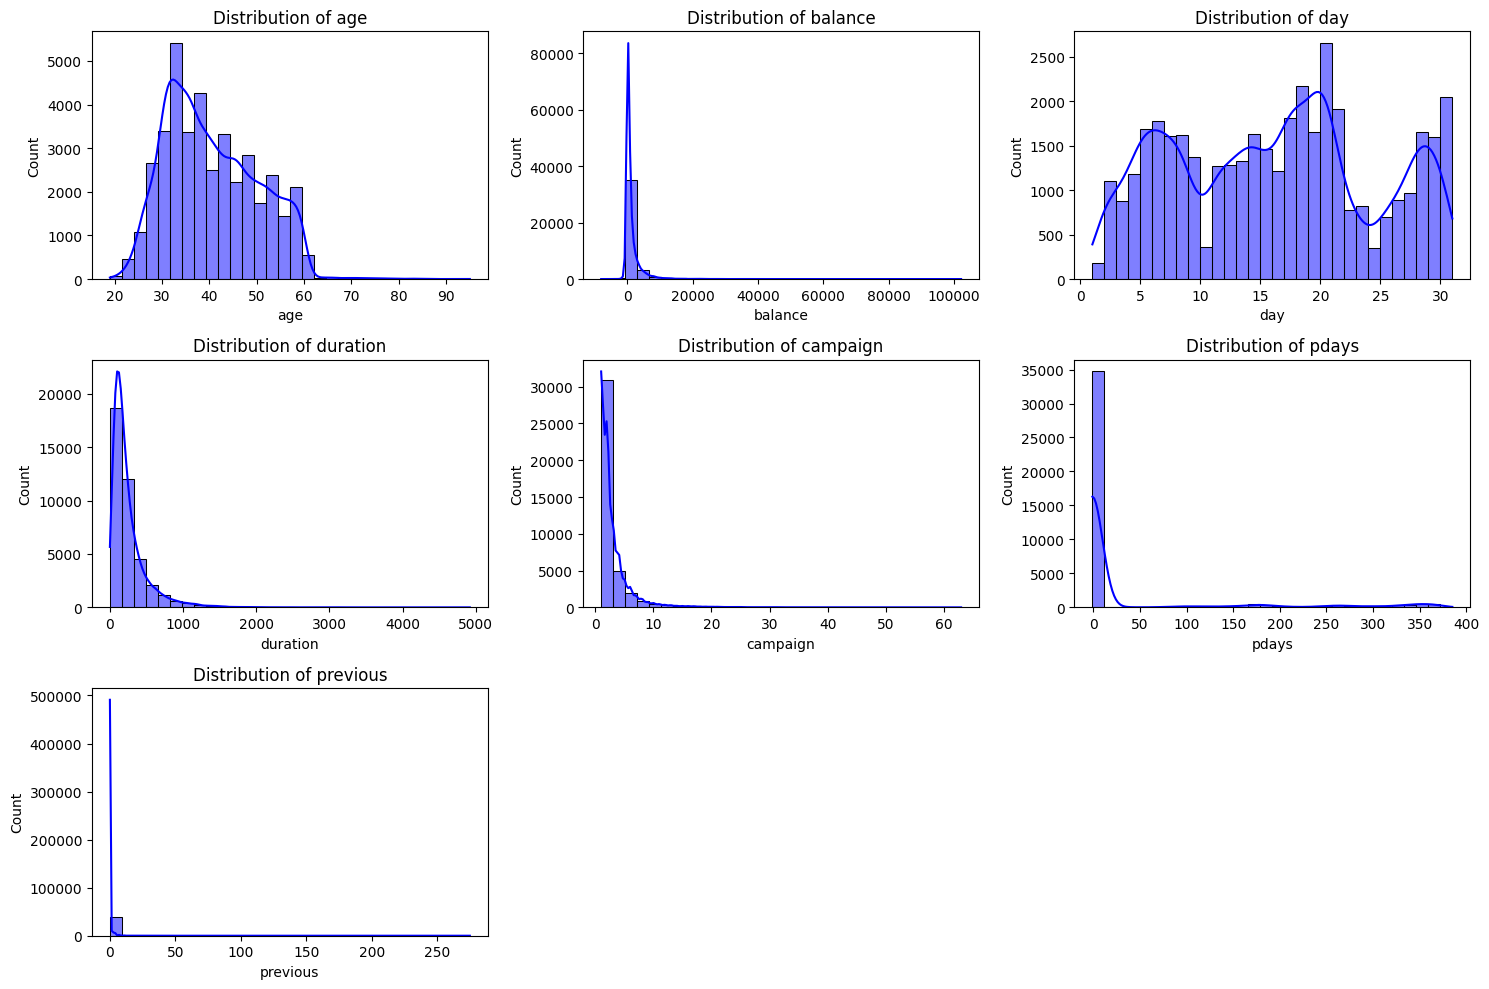

In [8]:
# Distribution of Numerical Columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

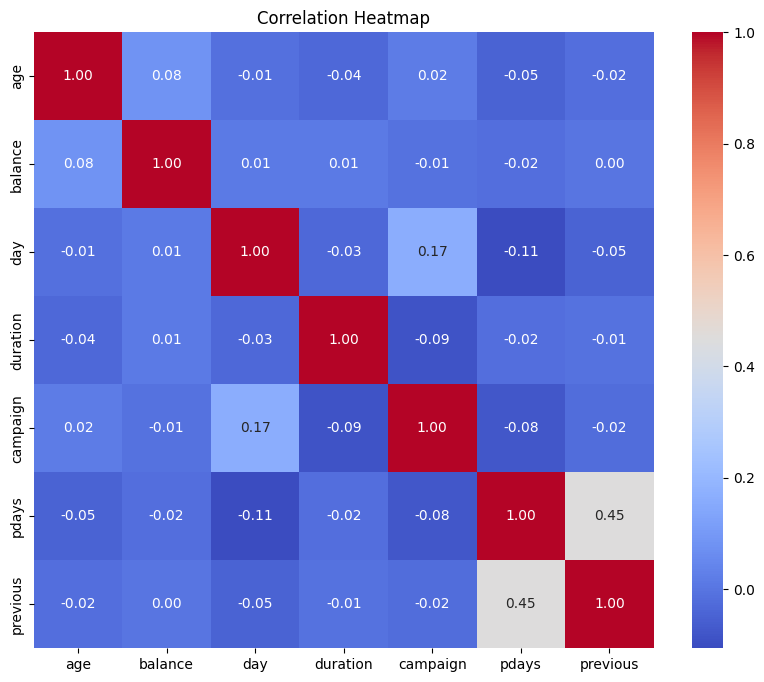

In [19]:
# Correlation Heatmap
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2873900492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='Set2')


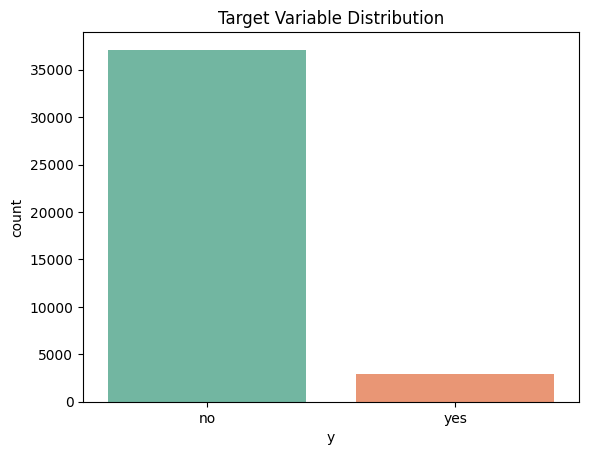

In [10]:
# Target Variable Distribution (if 'y' exists)
if 'y' in data.columns:
    sns.countplot(x='y', data=data, palette='Set2')
    plt.title('Target Variable Distribution')
    plt.show()

C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2983316163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='viridis')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2983316163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='viridis')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2983316163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, palette='viridis')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2983316163.py:5: FutureWarning: 

Passing

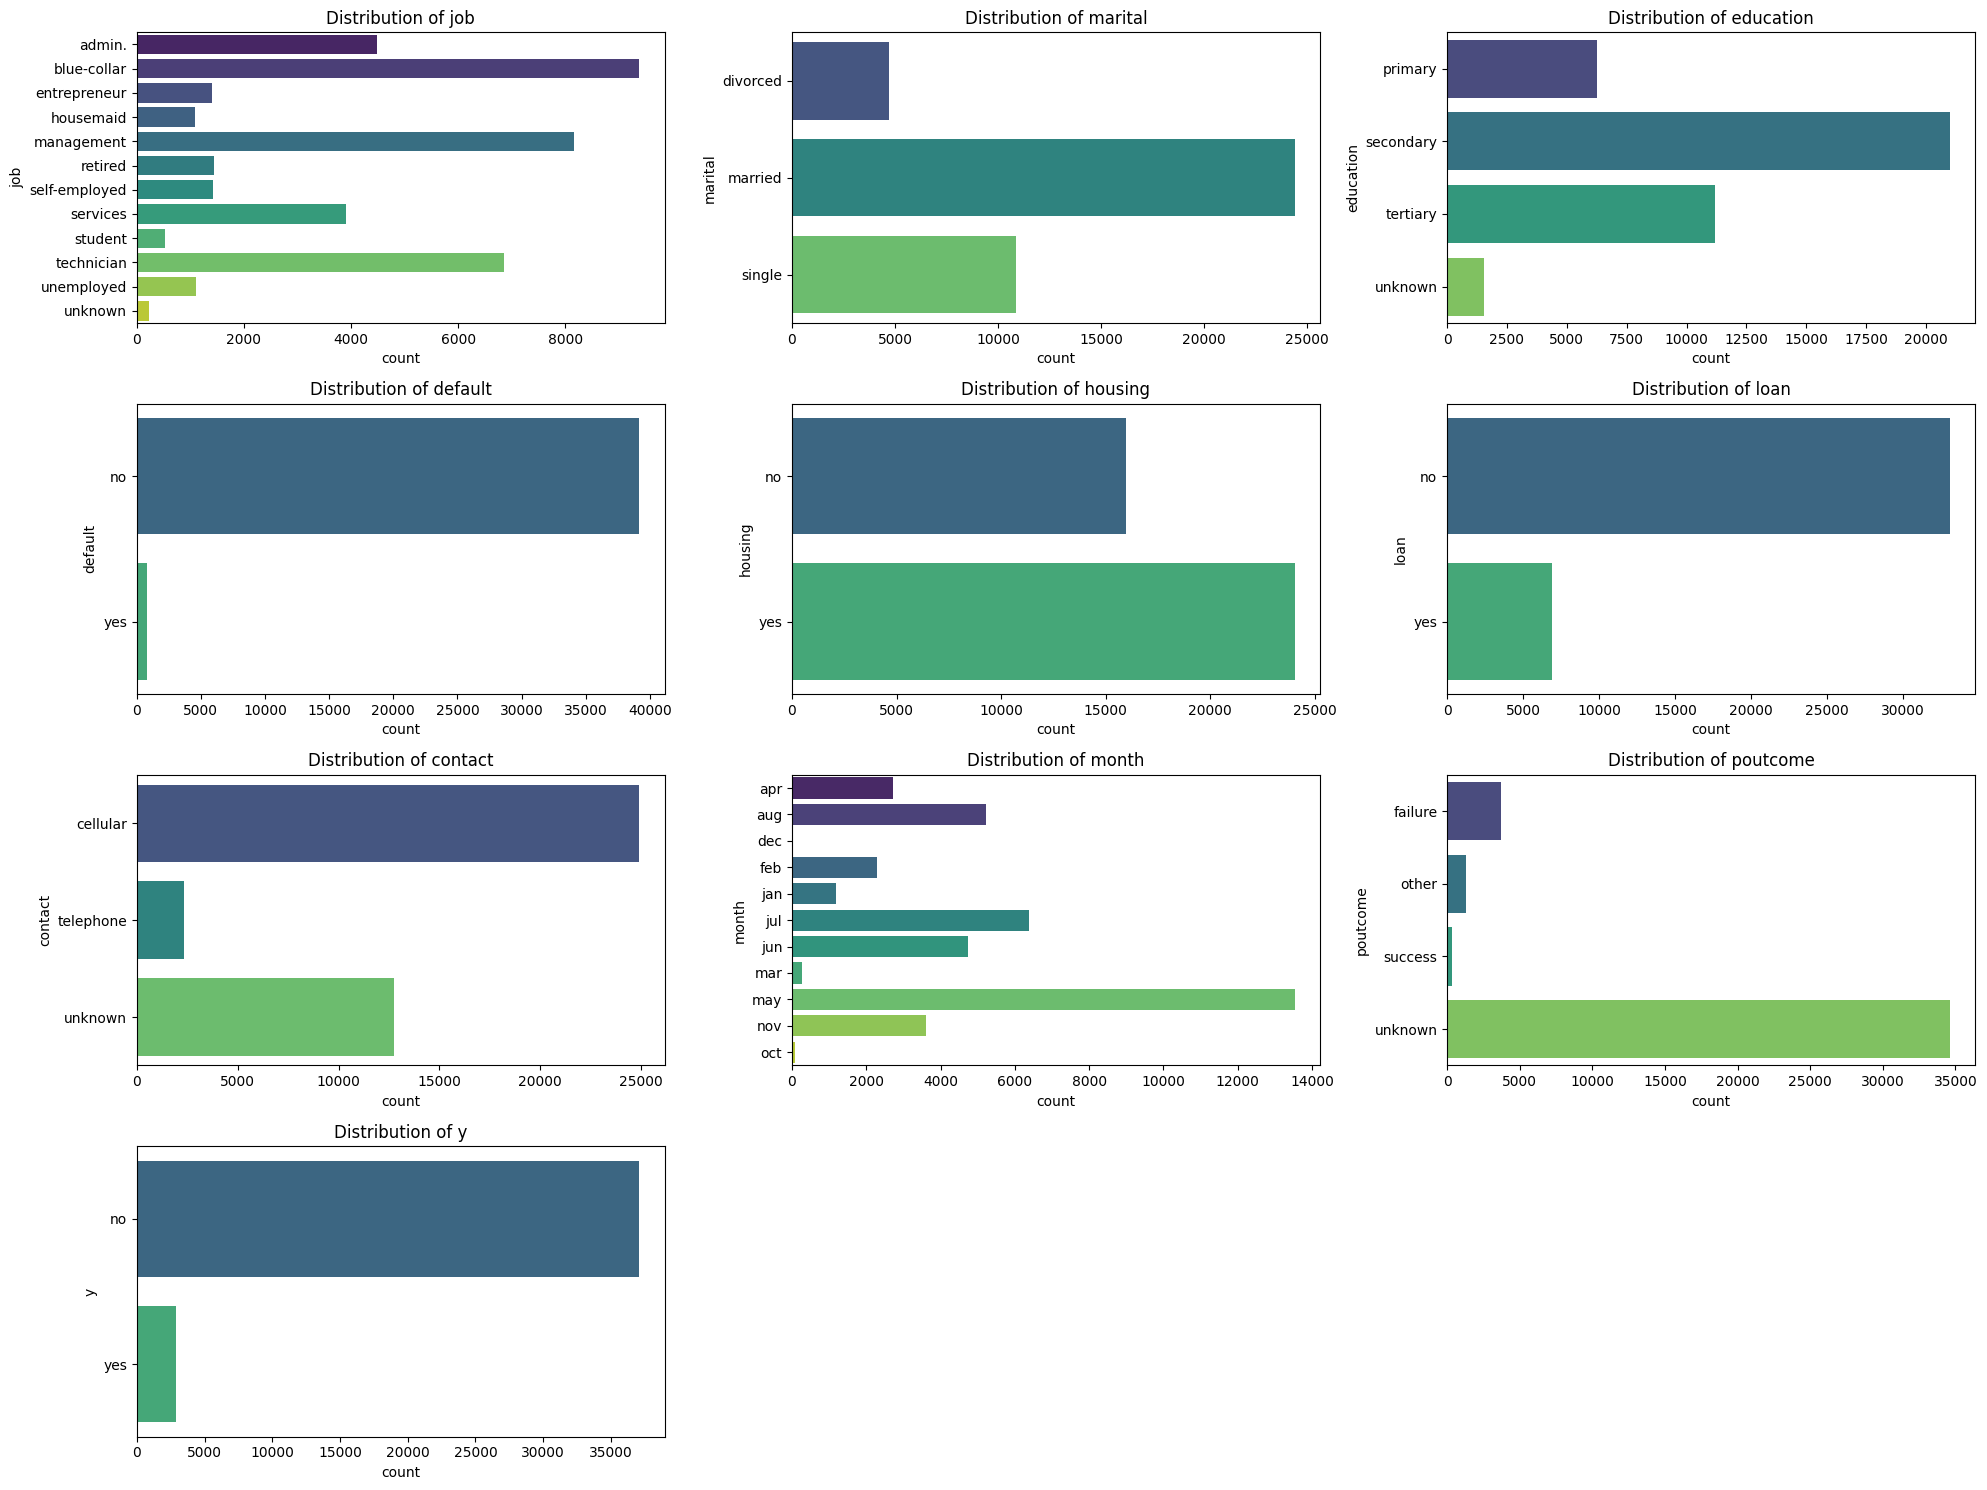

In [11]:
# Categorical Variable Distribution
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=col, data=data, palette='viridis')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

C:\Users\krush\AppData\Local\Temp\ipykernel_27924\1203996912.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=data, palette='Set3')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\1203996912.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=data, palette='Set3')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\1203996912.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=data, palette='Set3')
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\1203996912.py:6: FutureWarning: 

P

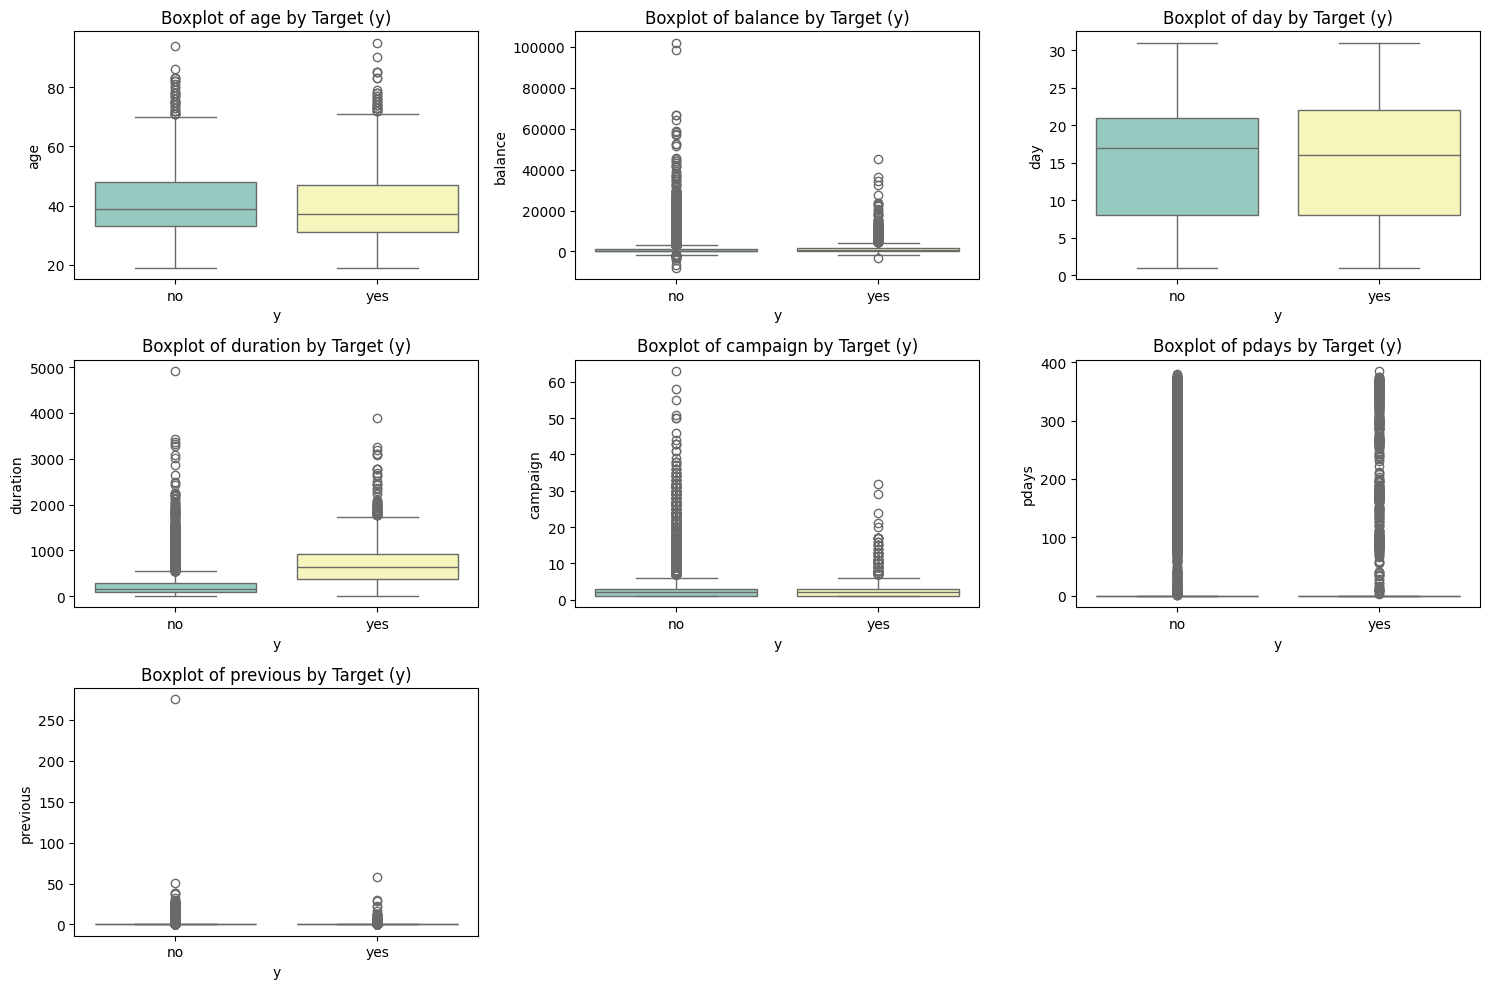

In [12]:
# Boxplot of Numerical Variables against Target (if 'y' exists)
if 'y' in data.columns:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(x='y', y=col, data=data, palette='Set3')
        plt.title(f"Boxplot of {col} by Target (y)")
    plt.tight_layout()
    plt.show()

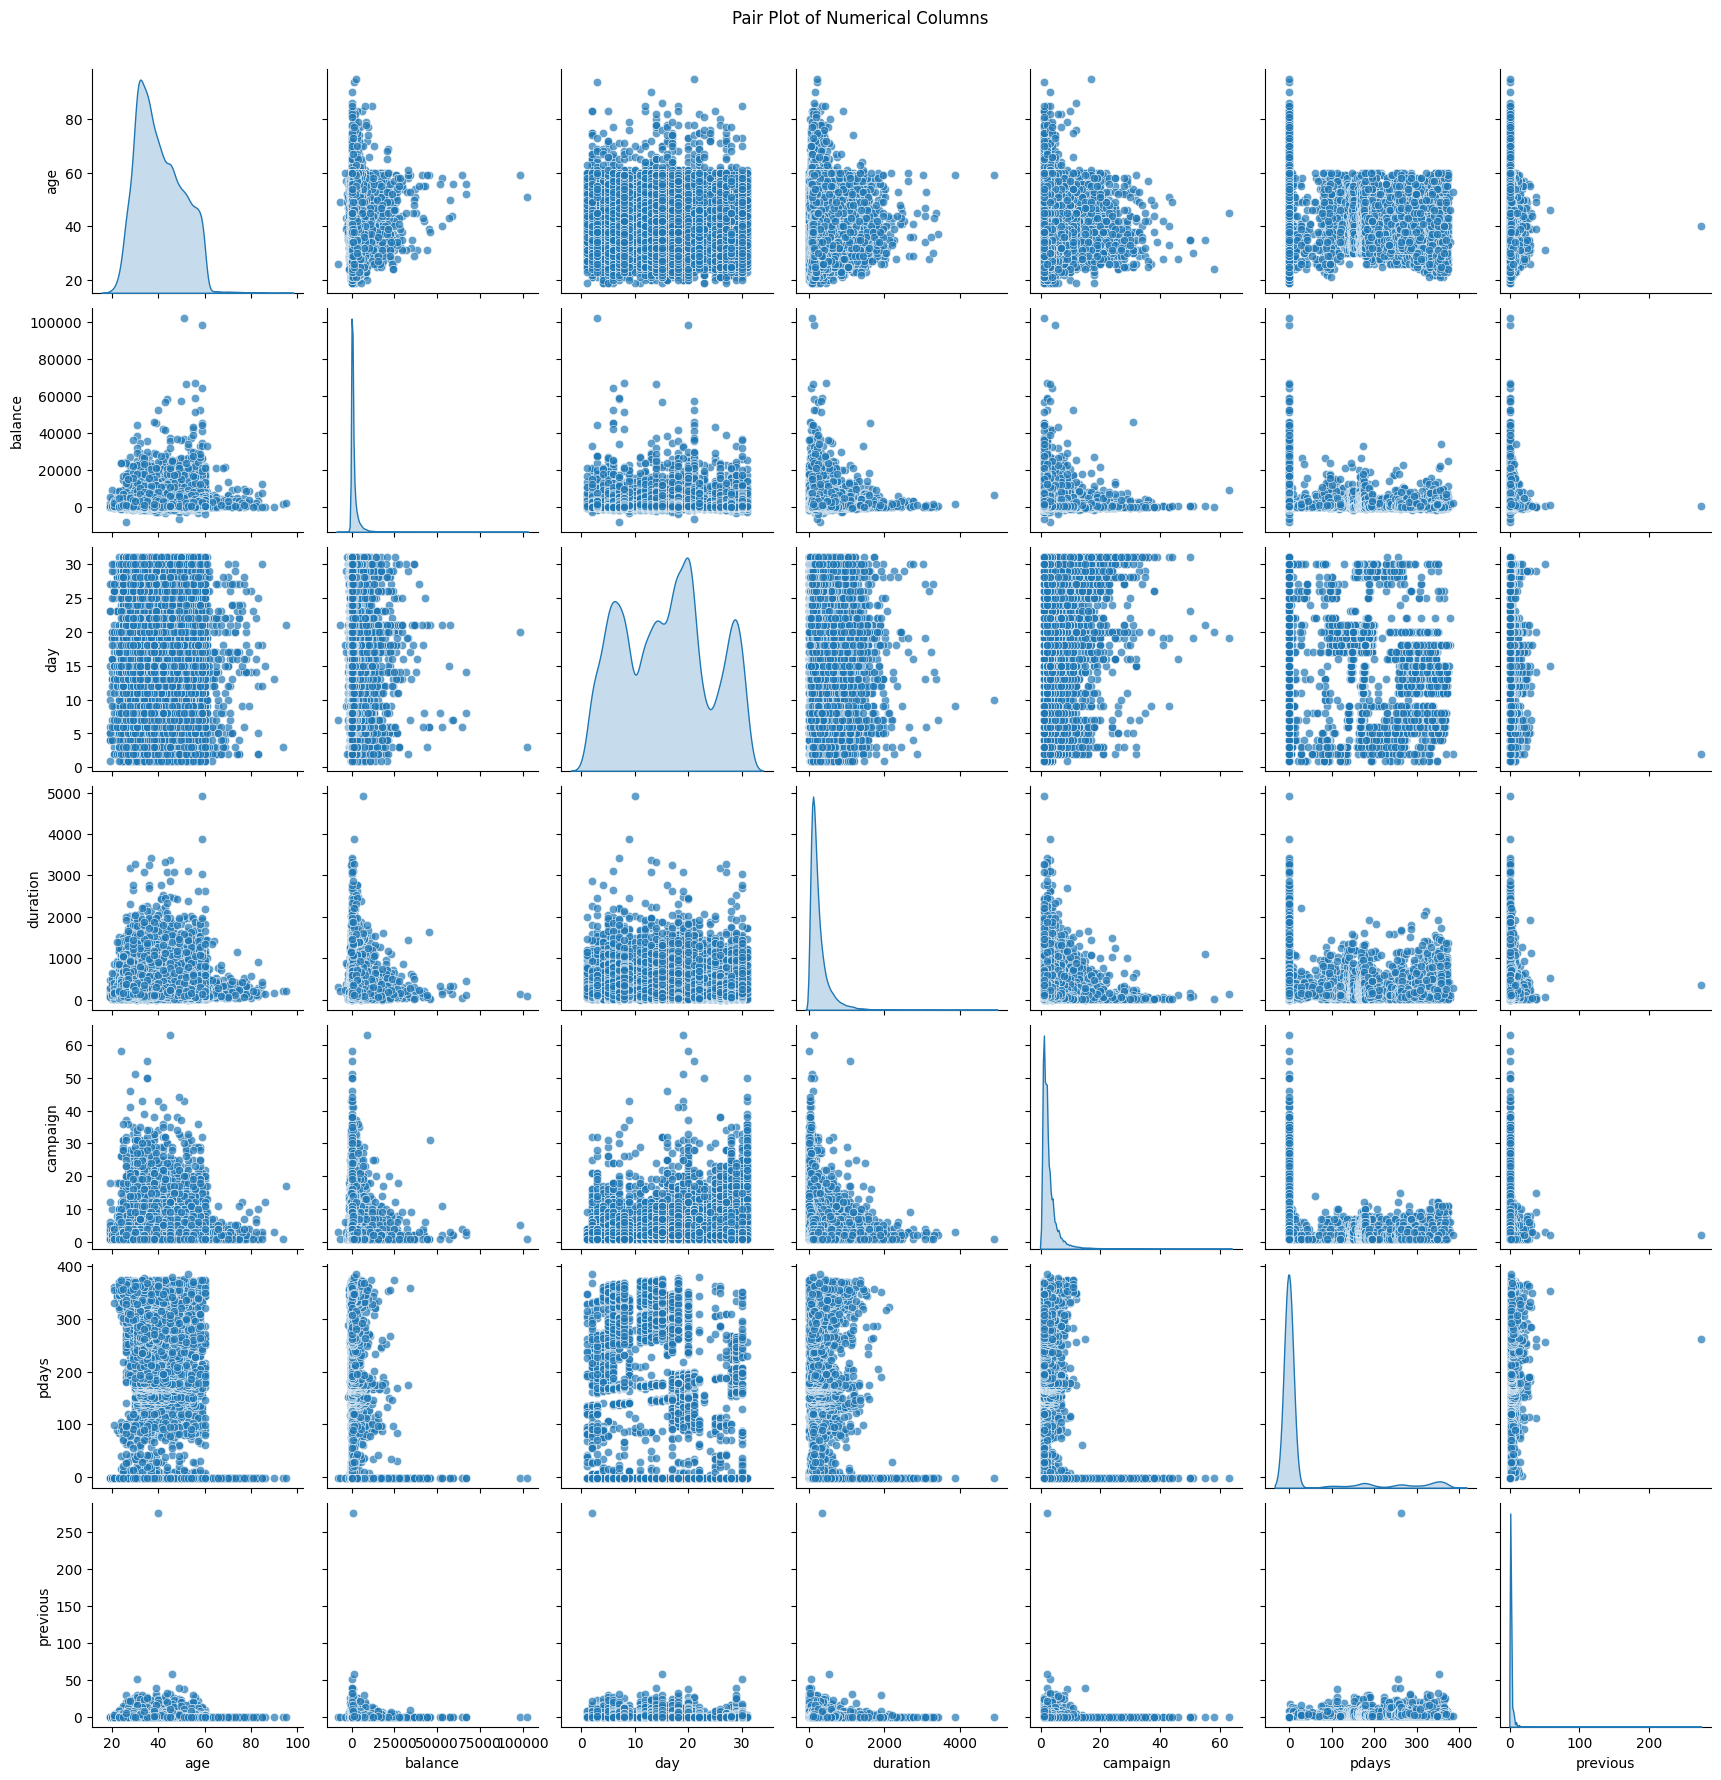

In [13]:
# Pair Plot of Numerical Columns
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2667895067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2667895067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)
C:\Users\krush\AppData\Local\Temp\ipykernel_27924\2667895067.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel', order=data[col].va

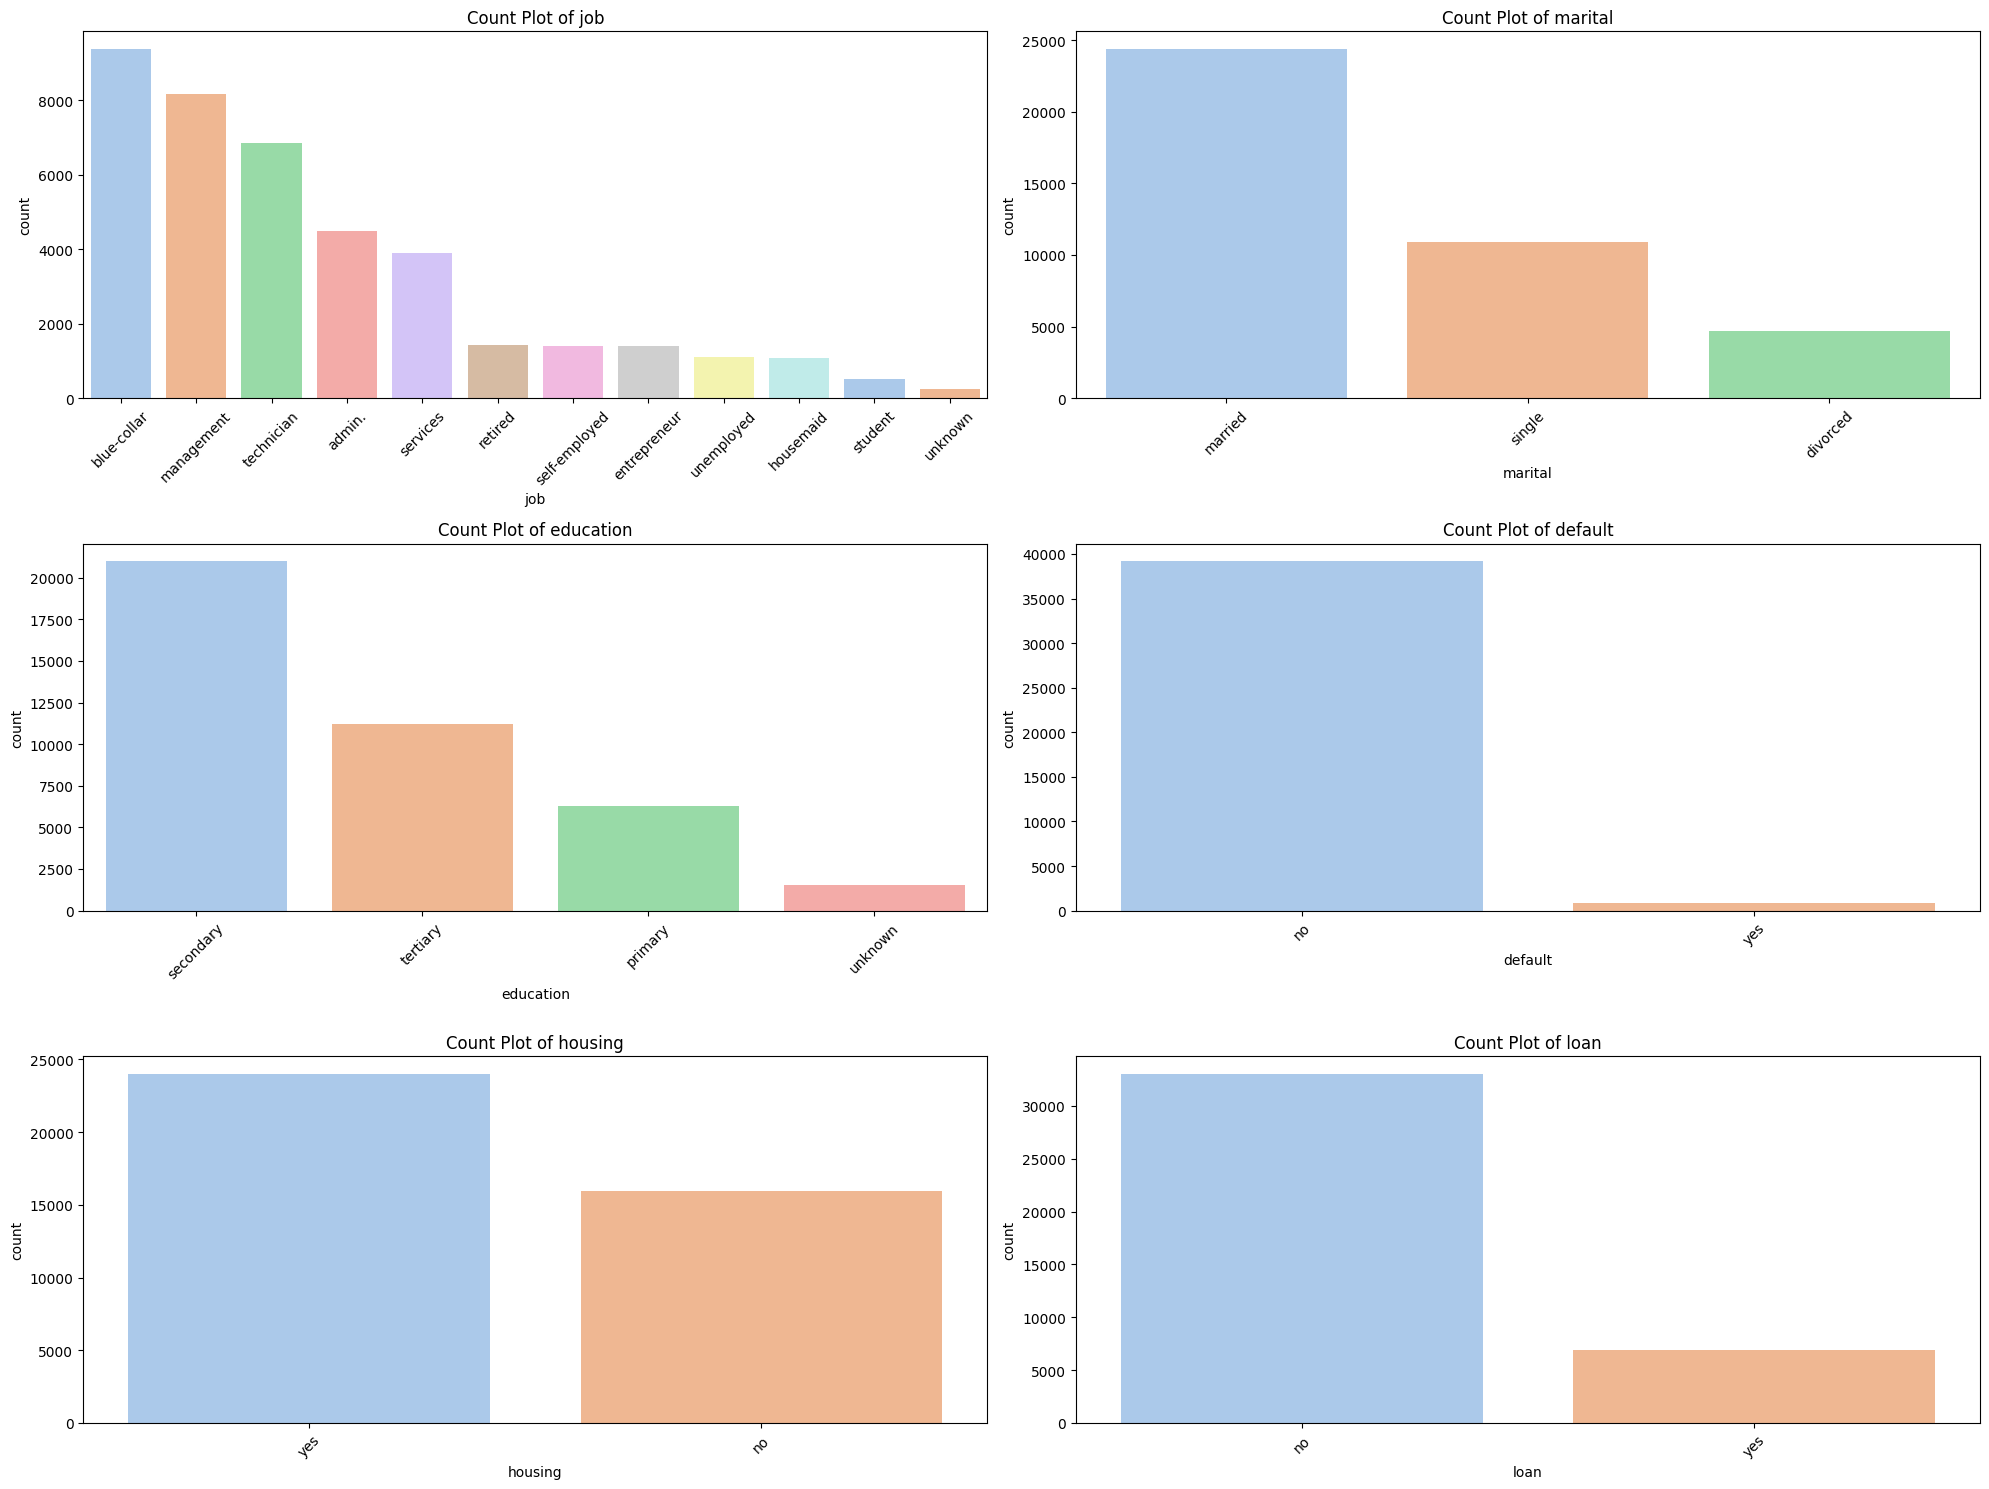

In [14]:
# Count Plots for Categorical Variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns[:6], 1):  # Limit to first 6 categorical variables for clarity
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=data, palette='pastel', order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()


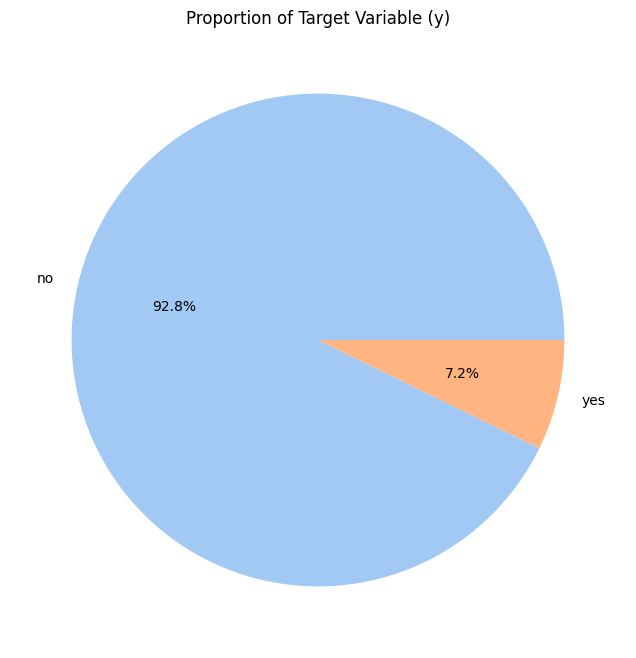

In [15]:
# Pie Chart for Proportions of Target Variable (if 'y' exists)
if 'y' in data.columns:
    plt.figure(figsize=(8, 8))
    data['y'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title('Proportion of Target Variable (y)')
    plt.ylabel('')
    plt.show()


In [20]:
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_info = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = {
            "num_outliers": len(outliers),
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
        }
    return outlier_info

# Detect outliers
outlier_summary = detect_outliers_iqr(data)

In [21]:
outlier_summary

{'age': {'num_outliers': 79,
  'lower_bound': np.float64(10.5),
  'upper_bound': np.float64(70.5)},
 'balance': {'num_outliers': 4280,
  'lower_bound': np.float64(-1843.5),
  'upper_bound': np.float64(3216.5)},
 'day': {'num_outliers': 0,
  'lower_bound': np.float64(-11.5),
  'upper_bound': np.float64(40.5)},
 'duration': {'num_outliers': 3000,
  'lower_bound': np.float64(-219.5),
  'upper_bound': np.float64(632.5)},
 'campaign': {'num_outliers': 2992,
  'lower_bound': np.float64(-2.0),
  'upper_bound': np.float64(6.0)},
 'pdays': {'num_outliers': 5393,
  'lower_bound': np.float64(-1.0),
  'upper_bound': np.float64(-1.0)},
 'previous': {'num_outliers': 5393,
  'lower_bound': np.float64(0.0),
  'upper_bound': np.float64(0.0)}}

In [23]:
# Outlier Detection and Removal using IQR
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    print(f"Outliers removed in {col}.")

Outliers removed in age.
Outliers removed in balance.
Outliers removed in day.
Outliers removed in duration.
Outliers removed in campaign.
Outliers removed in pdays.
Outliers removed in previous.


In [24]:
data.shape

(26132, 17)

In [29]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
train_data = pd.DataFrame(data)

In [27]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:


# Save Cleaned and Analyzed Dataset as CSV
train_data.to_csv('C:/Users/krush/OneDrive/Desktop/New folder (3)/cleaned_train.csv', index=False)
